In [ ]:
import simpleaudio as sa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

In [ ]:
audios = {
    'archivo_wav1': 'sound1.wav',
    'archivo_wav2': 'sound2.wav',
    'archivo_wav3': 'sound3.wav',
    'archivo_wav4': 'sound4.wav',
    'archivo_wav5': 'sound5.wav'
}

### Reproducimos el audio 

In [ ]:
# Load a wave file and play it
# wave_obj = sa.WaveObject.from_wave_file(audios['archivo_wav1'])
# play_obj = wave_obj.play()
# play_obj.wait_done()

### Representamos el wave file en tiempo continuo y discreto

In [ ]:
for archivo_wav in audios.values():
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    numero_muestras = np.arange(0, len(datos)) 
    tiempo_continuo = numero_muestras / frecuencia_muestreo
    
    print(f'plot the wave {archivo_wav}')
    
    datos = datos / (2.**15) # normalizar los datos a -1 a 1 

    plt.figure(figsize=(12,6))
    plt.plot(tiempo_continuo, datos)
    plt.title('Señal de audio en tiempo continuo - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.stem(numero_muestras, datos)
    plt.title('Señal de audio en tiempo discreto - {}'.format(archivo_wav))
    plt.xlabel('Numero de muestras')
    plt.ylabel('Amplitud')
    plt.show()
    
    print("--------------------------------------------------------------------")


### Ejercicio 1.2

Para los sonidos 1,2,3. Crea un vector que contenga un tramo de
100ms de la señal correspondiente en donde aparezca sonido

Plot the frame sound1.wav
 * potencia es: 0.0013667823540024636
 * energia es: 45.92388709448278


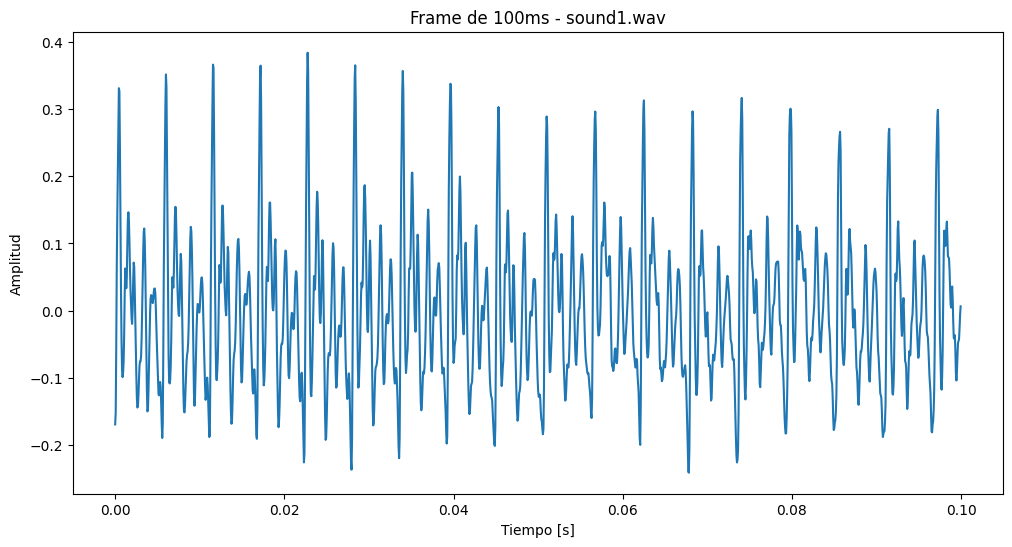

--------------------------------------------------------------------
Plot the frame sound2.wav
 * potencia es: 0.00023101726882985248
 * energia es: 12.937198071740568


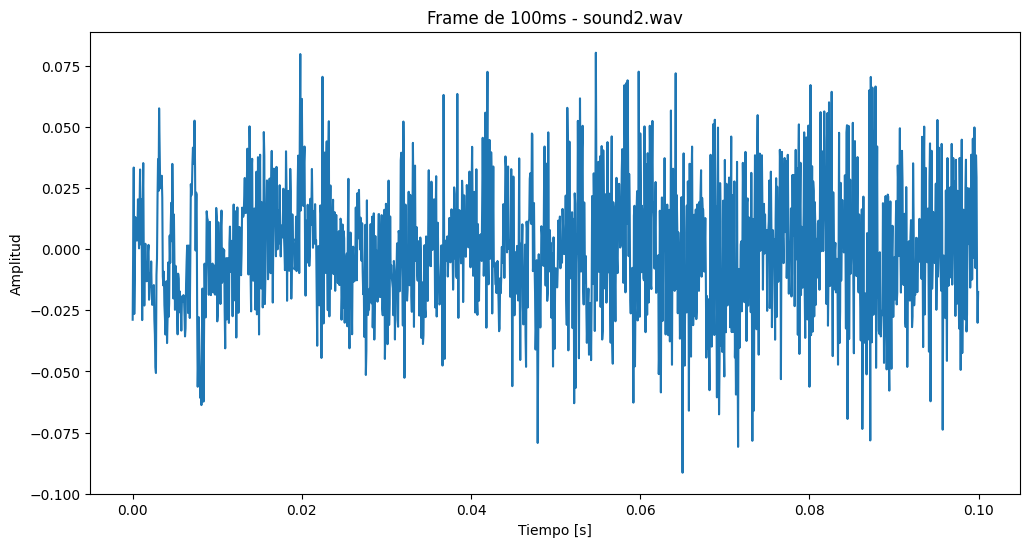

--------------------------------------------------------------------
Plot the frame sound3.wav
 * potencia es: 0.001762900963553783
 * energia es: 70.51780144311488


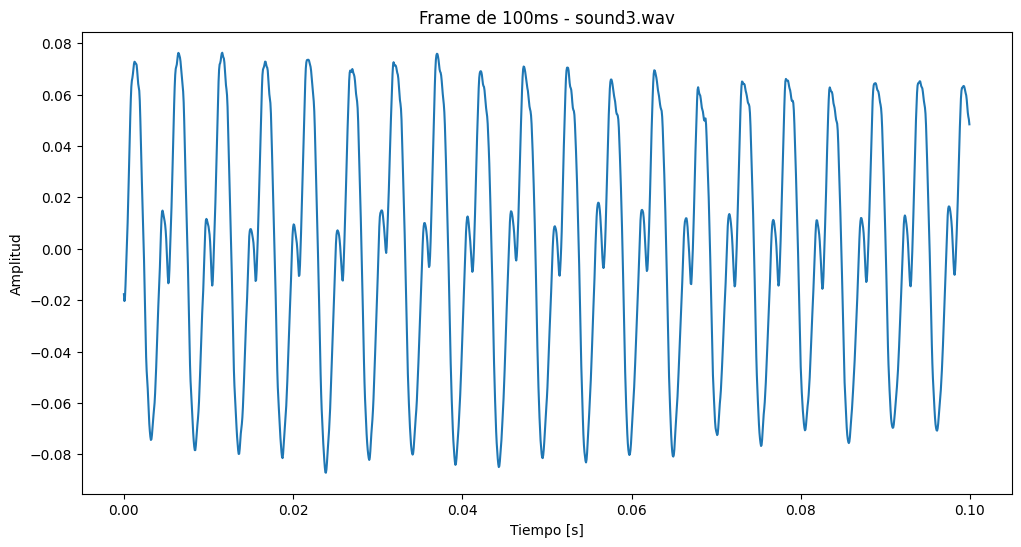

--------------------------------------------------------------------


In [131]:
# List of audio files
tres_audios = {
    'archivo_wav1': 'sound1.wav',
    'archivo_wav2': 'sound2.wav',
    'archivo_wav3': 'sound3.wav'
}

muestras_audios = {
    'sound1.wav': 13800,
    'sound2.wav': 11000,
    'sound3.wav': 1000,
    'sound4.wav': 17500,
    'sound5.wav': 12300
}

for archivo_wav in tres_audios.values():
# Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    datos = datos / (2.**15) # normalizar los datos a -1 a 1

    # Calculate how many samples are in 100ms
    num_samples = int(frecuencia_muestreo * 0.1)

    # Create a dictionary to store the samples
    frame = datos[muestras_audios[archivo_wav]:muestras_audios[archivo_wav] + num_samples] # 100ms frame
    
    print(f'Plot the frame {archivo_wav}')
    
    #power
    power = 1/len(datos) * np.sum(np.abs(datos)**2)
    print(f' * potencia es: {power}')
    
    #energy
    energy = np.sum(np.abs(datos**2))
    print(f' * energia es: {energy}')
    
    tiempo = np.arange(0, len(frame)) / frecuencia_muestreo

    plt.figure(figsize=(12, 6))
    plt.plot(tiempo, frame)
    plt.title('Frame de 100ms - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()
 
    print("--------------------------------------------------------------------")

### Ejercicio 1.3 

El vector tiene de sound1.wav tiene 21 componentes
range(0, 33600, 1600)
energia es [0.08559393789619207, 0.12953547202050686, 0.15583775751292706, 0.06033032573759556, 0.32659940514713526, 0.22706784214824438, 0.12444030214101076, 0.4252646928653121, 14.418749311938882, 14.785165996290743, 8.636234330944717, 5.143763012252748, 0.7146862922236323, 0.1322777485474944, 0.05434093065559864, 0.10392190329730511, 0.10410045832395554, 0.10501514468342066, 0.1091882586479187, 0.0816809730604291, 9.299814701080322e-05]


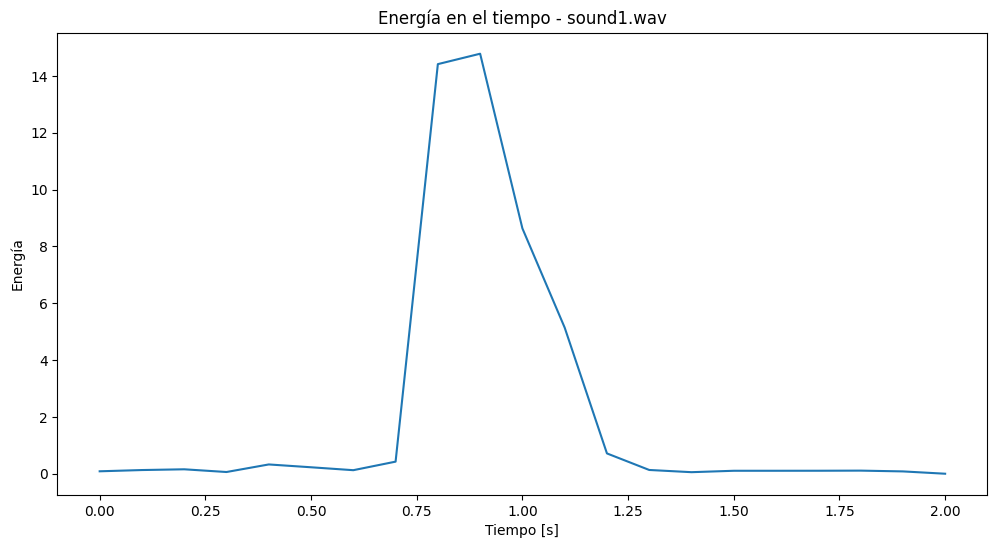

El vector tiene de sound2.wav tiene 35 componentes
range(0, 56001, 1600)
energia es [0.014667846262454987, 0.026051511988043785, 0.040425606071949005, 0.05605725012719631, 0.05694954842329025, 0.0796706210821867, 0.24644496757537127, 1.063700770959258, 1.0943534560501575, 0.8706047693267465, 0.8498542262241244, 0.6652174815535545, 0.7540154736489058, 0.6236554803326726, 0.6009988309815526, 0.5255564292892814, 0.43344683572649956, 0.6498155388981104, 0.4958644285798073, 0.4556922931224108, 0.5391442338004708, 0.5557246934622526, 0.7049128292128444, 0.4736090134829283, 0.3874937556684017, 0.16096194181591272, 0.0881522810086608, 0.04446025565266609, 0.04633668251335621, 0.09452912118285894, 0.07683396991342306, 0.04308762587606907, 0.059376973658800125, 0.024297401309013367, 0.03503856901079416, 0.00019535794854164124]


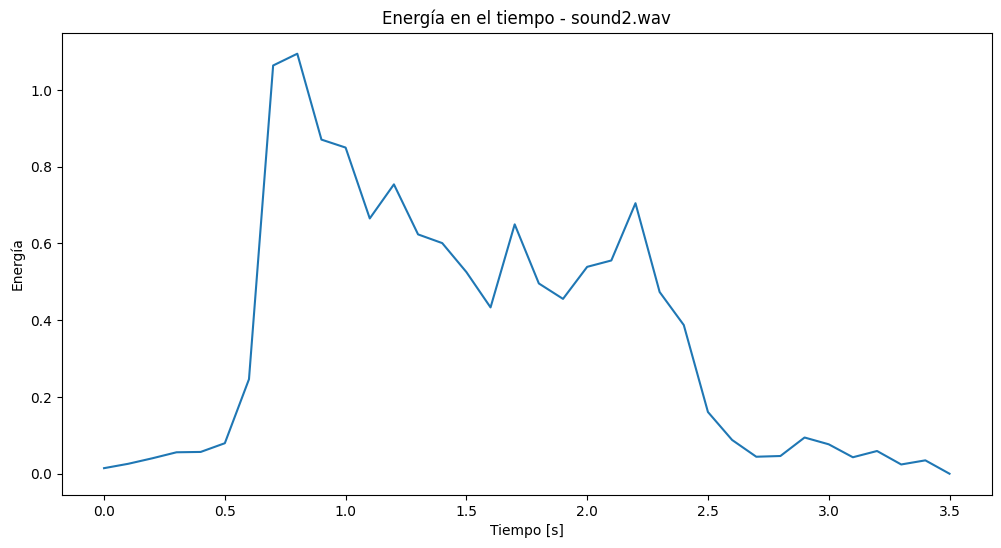

El vector tiene de sound3.wav tiene 25 componentes
range(0, 40001, 1600)
energia es [3.8680608980357647, 3.325016030110419, 3.31144511513412, 3.272985367104411, 3.8554872646927834, 4.2802582094445825, 4.010489886626601, 3.533460848033428, 3.5331948790699244, 3.3566996278241277, 3.560741520486772, 3.2981913778930902, 3.0752149084582925, 2.6167802046984434, 2.25417712982744, 2.0346332089975476, 1.955746054649353, 1.8405979266390204, 1.9668223951011896, 1.4413903476670384, 1.6542412899434566, 1.8238514559343457, 1.7027276838198304, 2.9137479551136494, 2.031564245931804, 0.00027561187744140625]


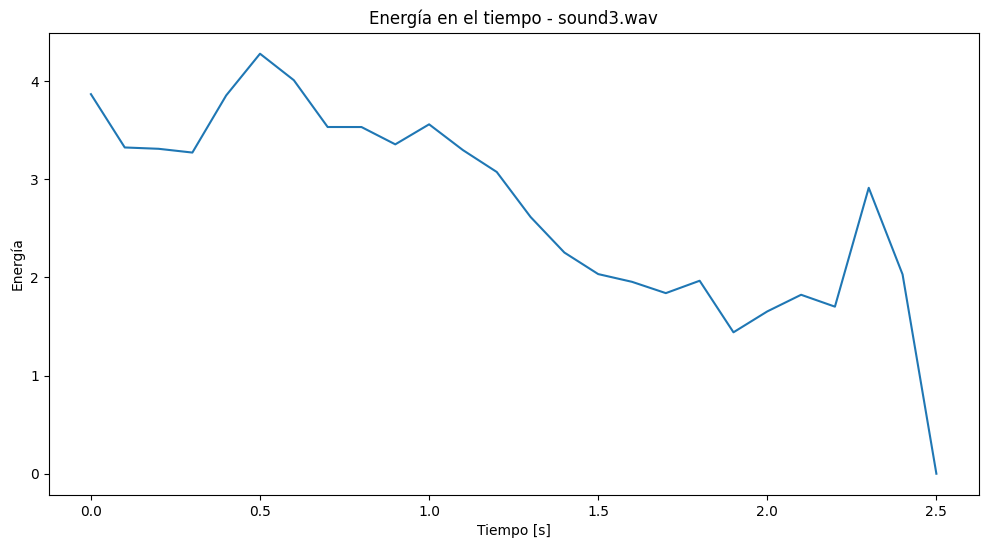

In [163]:


for archivo_wav in tres_audios.values():
    
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    datos = datos / (2.**15) # normalizar los datos a -1 a 1
    
    #datos = datos / (2.**15) # normalizar los datos a -1 a 1
    
    L_frame = int(0.1 * frecuencia_muestreo) # 100ms
    
    frame = datos[muestras_audios[archivo_wav]:muestras_audios[archivo_wav] + L_frame] # 100ms frame
    
    print(f"El vector tiene de {archivo_wav} tiene {len(datos)//L_frame} componentes")

    #haz vector energía que contenga L_frames de datos
    energia_frame = []
 
    for i in range(0, len(datos), L_frame): #this is the same as range(0, len(datos), L_frame) 
        energia_frame.append(np.sum(datos[i:(i+L_frame)]**2))
        
    print(f'energia es {energia_frame}')

    #tiempo = np.arange(0, len(energia_frame)) * L_frame / frecuencia_muestreo
    tiempo = np.arange(len(energia_frame)) * 0.1
    
    plt.figure(figsize=(12, 6))
    plt.plot(tiempo, energia_frame)
    plt.title('Energía en el tiempo - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Energía')
    plt.show()
    
    energia_frame.clear()   

### Ejercicio 1.4

In [ ]:
# for archivo_wav in audio_files:
    
#     # Get the sample rate and data
#     frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
#     L_frame = int(0.02 * frecuencia_muestreo) # 20ms
#     overlap = int(L_frame * 0.5)
    
#     print(f"El vector tiene de {archivo_wav} tiene {len(datos)//(L_frame-overlap)} componentes")

#     # Create an array to store the energy values
#     energia = np.zeros(len(datos)//(L_frame-overlap))

#     # Calculate the energy for each frame
#     for i in range(len(datos)//(L_frame-overlap)):
#         start = i * (L_frame - overlap)
#         end = start + L_frame
#         frame = datos[start:end]
#         energia[i] = np.sum(frame**2)

#     # Plot the energy
#     plt.figure(figsize=(12, 6))
#     plt.plot(tiempo[:len(datos)//(L_frame-overlap)], energia) # tiempo[:len(datos)//(L_frame-overlap)] is to make the time the same size as the energy
#     plt.title('Energía de la señal')
#     plt.xlabel('Tiempo [s]')
#     plt.ylabel('Energía')
#     plt.show()

for archivo_wav in audios.values():
    
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    L_frame = int(0.02 * frecuencia_muestreo) # 20ms
    overlap = int(L_frame * 0.5)
    
    print(f"El vector tiene de {archivo_wav} tiene {len(datos)//(L_frame-overlap)} componentes")

    # Create an array to store the energy values
    energia = np.zeros(len(datos)//(L_frame-overlap))

    # Calculate the energy for each frame
    for i in range(len(datos)//(L_frame-overlap)):
        start = i * (L_frame - overlap)
        end = start + L_frame
        frame = datos[start:end]
        energia[i] = np.sum(frame**2)

    # Plot the energy
    plt.figure(figsize=(12, 6))
    plt.plot(tiempo[:len(datos)//(L_frame-overlap)], energia) # tiempo[:len(datos)//(L_frame-overlap)] is to make the time the same size as the energy
    plt.title('Energía de la señal')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Energía')
    plt.show()
